In [1]:
import os
import h5py
import sklearn.datasets
import pandas as pd
import numpy as np
from Bio import SeqIO
from utils.general import LOCALIZATION
import seaborn as sns
from tqdm import tqdm
import umap
import matplotlib.pyplot as plt
os.chdir('C:/Users/HannesStark\\projects\\protein-localization')

In [16]:
embeddings_file = h5py.File(os.path.join('data/t5/deeploc_test/test_as_per_deeploc.h5'), 'r')
embeddings = []
labels = []
print(embeddings_file.keys())
for record in tqdm(SeqIO.parse(open('data/t5/deeploc_test/test_as_per_deeploc.fasta'), 'fasta')):
    if len(record.seq) < 13000:
        embeddings.append(embeddings_file[str(str(record.description).replace('.','_').replace('/','_'))][:])
        #embeddings.append(embeddings_file[str(record.description)][:])

        localization = record.description.split(' ')[1].split('-')[0]
        labels.append(localization)# get localization as integer
    else:
        print(record.description)
reduced_embeddings = np.array(embeddings)
labels = np.array(labels)

101it [00:00, 1009.79it/s]

<KeysViewHDF5 ['A0A068FIK2 Cytoplasm-S test', 'A0A0A7EQR3 Extracellular-S test', 'A0AQW4 Nucleus-U test', 'A0AVI4 Endoplasmic_reticulum-M test', 'A0AVK6 Nucleus-U test', 'A0PJY2 Nucleus-U test', 'A1XGB4 Cell_membrane-M test', 'A1Z9P3 Cytoplasm-S test', 'A2A8L1 Nucleus-U test', 'A2A935 Nucleus-U test', 'A2A9C3 Peroxisome-U test', 'A2AMM0 Cytoplasm-S test', 'A2APC3 Cytoplasm-S test', 'A2AR95 Cell_membrane-M test', 'A2AVQ5 Mitochondrion-U test', 'A2RV66 Endoplasmic_reticulum-M test', 'A2XFC1 Nucleus-U test', 'A4D1B5 Golgi_apparatus-U test', 'A4Q9F4 Cytoplasm-S test', 'A5D6W6 Endoplasmic_reticulum-M test', 'A6NNB3 Cell_membrane-M test', 'A6XGK3 Extracellular-S test', 'A6YSL1 Plastid-S test', 'A7MAS3 Cytoplasm-S test', 'A7WNV3 Extracellular-S test', 'A7WNV4 Extracellular-S test', 'A7WNV7 Extracellular-S test', 'A8B5P0 Extracellular-S test', 'A8E0R9 Cytoplasm-S test', 'A8IVX2 Cytoplasm-S test', 'A8MQ27 Cytoplasm-S test', 'A8MUP2 Mitochondrion-U test', 'B0BMY1 Lysosome_Vacuole-M test', 'B0FHH

2768it [00:03, 911.82it/s] 
<ipython-input-16-a0bc4075cb73>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  reduced_embeddings = np.array(embeddings)


In [36]:

embeddings_0 = np.load('data/results/embedings0.npy')
mapper0 = umap.UMAP().fit(embeddings_0)

In [5]:
embeddings_1 = np.load('data/results/embedings1.npy')
mapper1 = umap.UMAP().fit(embeddings_1)

In [6]:
embeddings_2 = np.load('data/results/embedings2.npy')
mapper2 = umap.UMAP().fit(embeddings_2)

In [ ]:
mapper_reduced = umap.UMAP().fit(reduced_embeddings)

In [ ]:
mapepr =
results = mapper.embedding_
import umap.plot
umap.plot.points(mapper, labels=labels)
range = 8

plt.xlim((mean[0]-range,mean[0]+range ))
plt.ylim((mean[1]-range,mean[1]+range ))



[[ 0.01014483  2.1584609 ]
 [ 5.675866    9.360887  ]
 [ 0.3196588   4.206238  ]
 ...
 [ 3.6954253  -2.1611533 ]
 [ 6.6588964   9.633529  ]
 [ 4.1126347  -3.5356035 ]]


NameError: name 'mean' is not defined

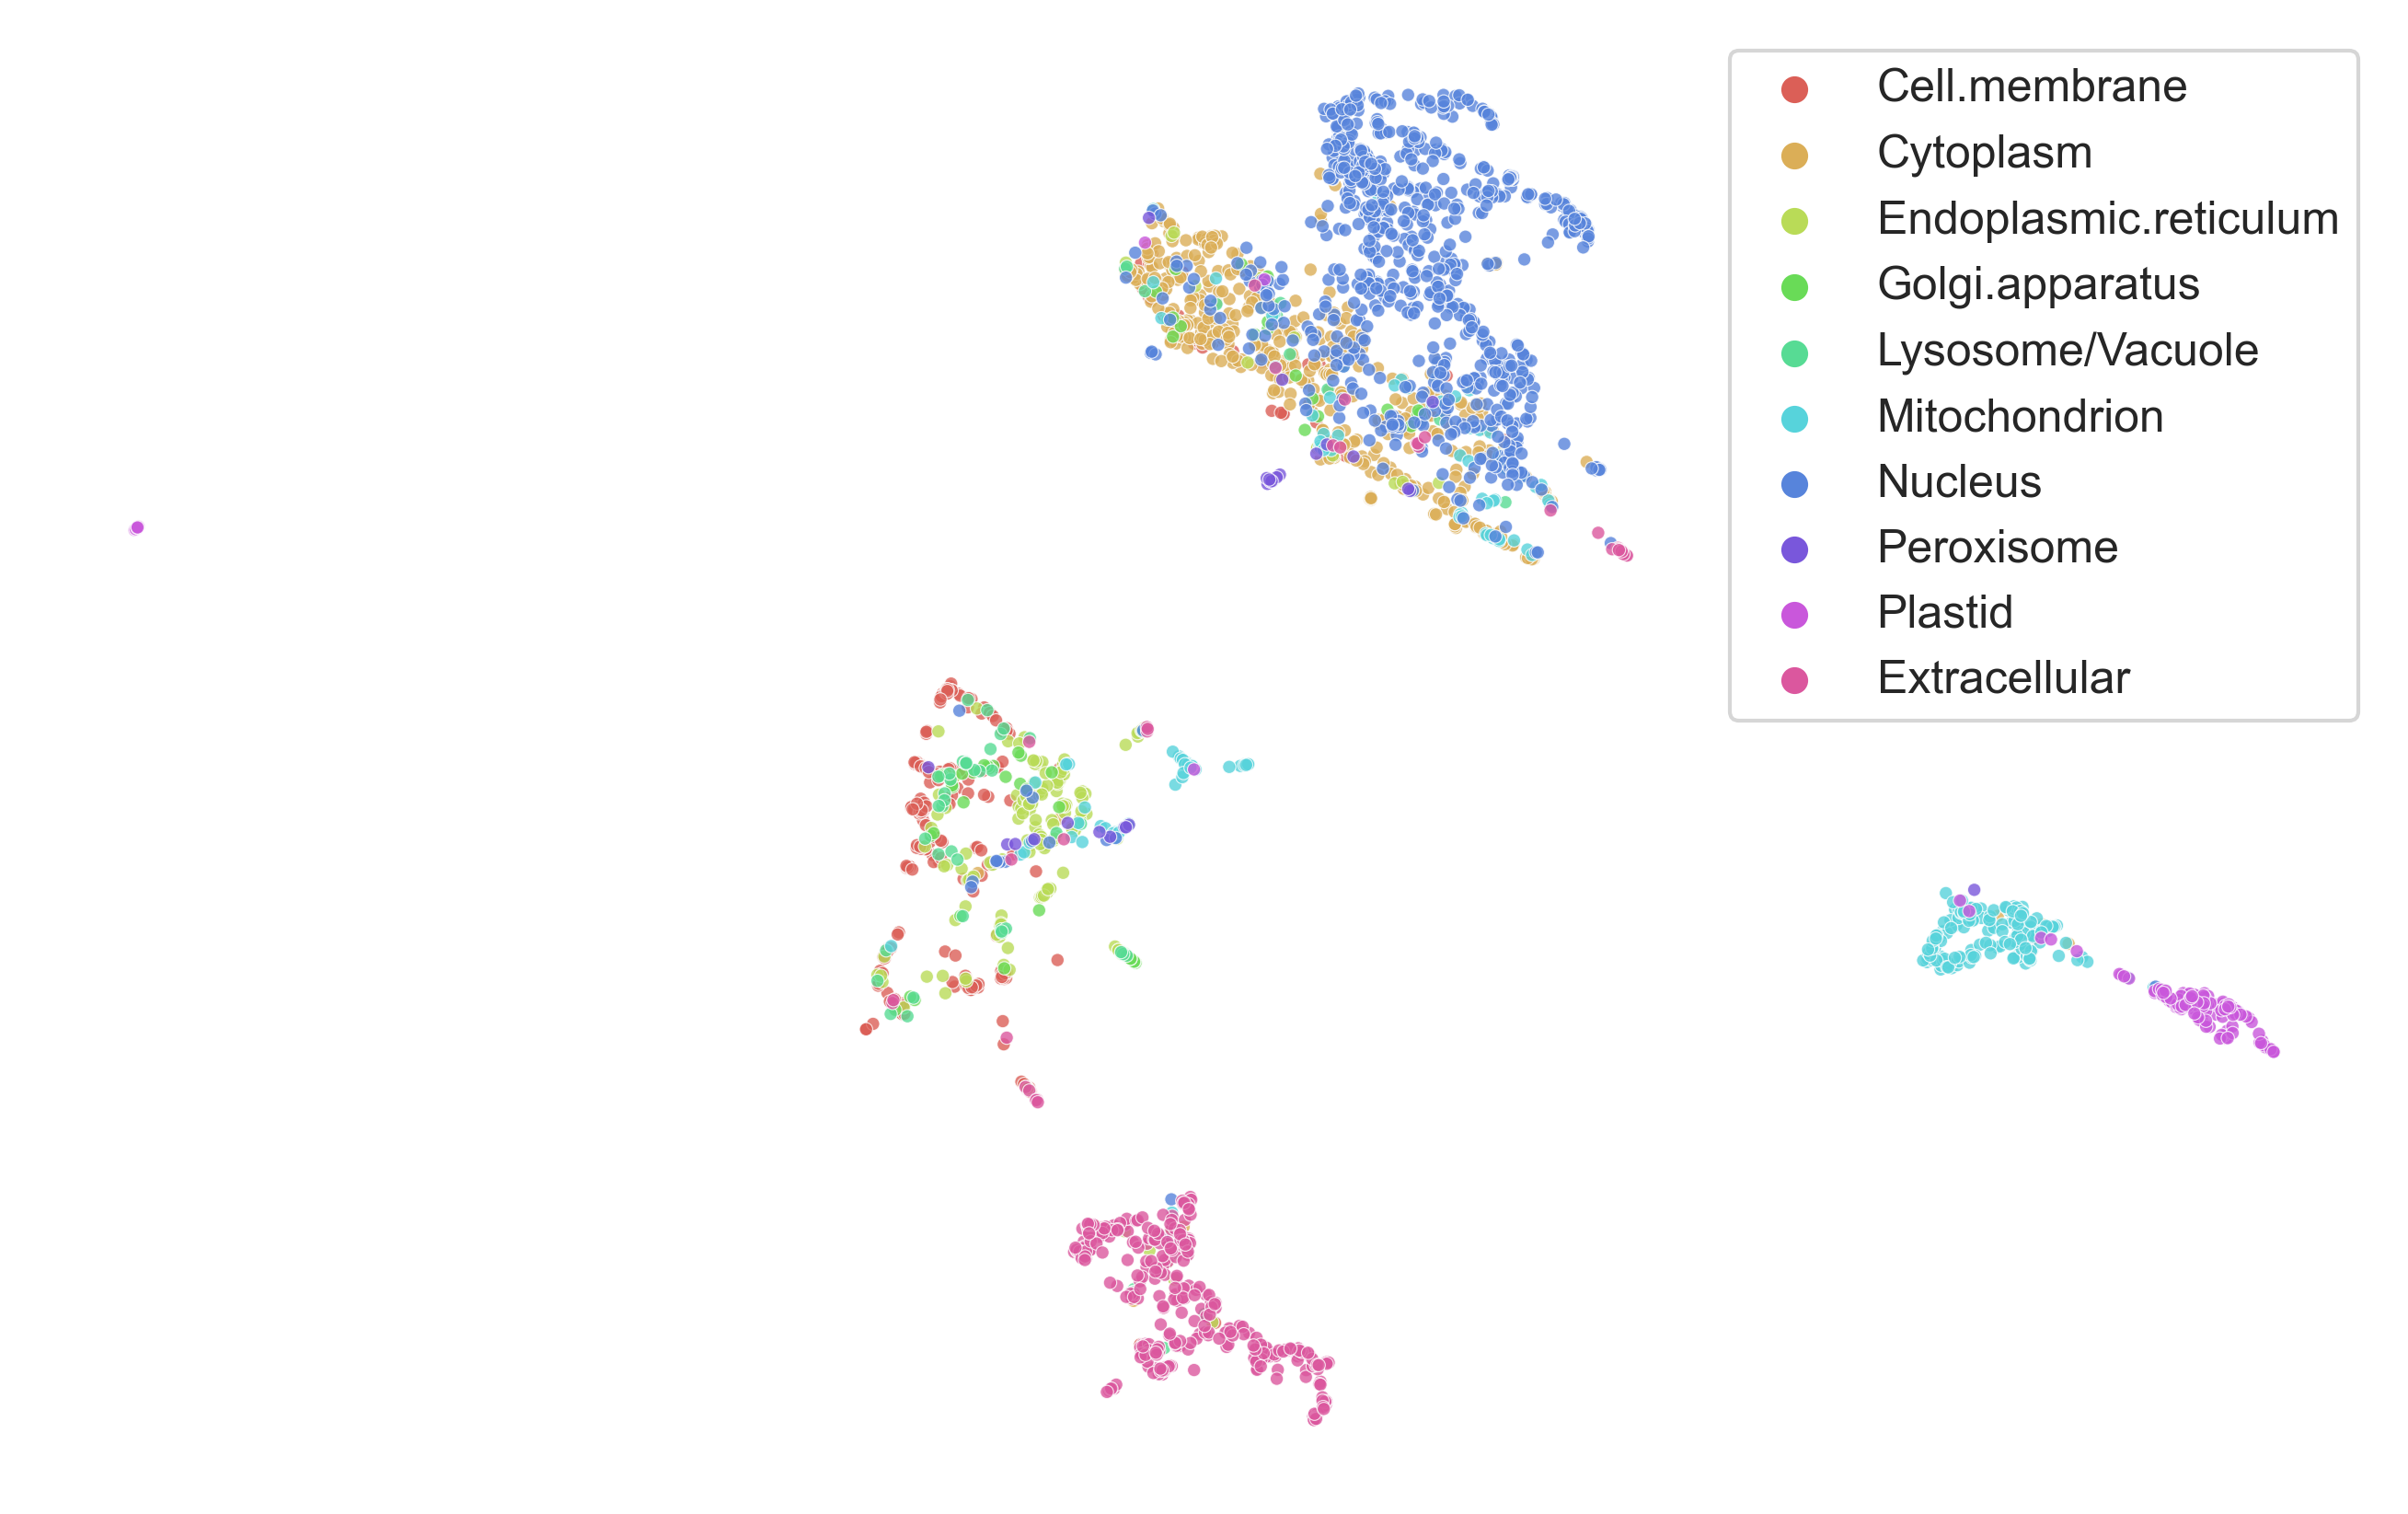

In [39]:

plt.rcParams['figure.dpi'] = 300

mapper = mapper2

sns.set(rc={'figure.figsize':(11,7)})
sns.set_style("white")
results = mapper.embedding_
print(results)
int_labels = []
for label in labels:
    int_labels.append(LOCALIZATION.index(label))
sns.scatterplot(x= results[:, 0], y=results[:, 1], hue=labels, palette='hls',alpha=0.8, s=12)
#plt.scatter(
#    results[:, 0],
#    results[:, 1],
#    s=12,
#    c=[sns.color_palette()[x] for x in int_labels])

range = 8
plt.axis('off')
#plt.legend().remove()
plt.legend( prop={'size': 12})
plt.savefig('umap.png',bbox_inches = 'tight',pad_inches = 0)
plt.xlim((mean[0]-range-1,mean[0]+range -2))
plt.ylim((mean[1]-range+1,mean[1]+range+1))
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0,
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('umap.png',bbox_inches = 'tight',pad_inches = 0)